Cuisines dataset
-----------------

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from imblearn.over_sampling import SMOTE

Synthetic Minority Oversampling Technique or SMOTE is a technique for upsampling the minority clasees by synthesizing new examples from already existing examples.

In [2]:
cuisines = pd.read_csv("cuisines.csv")
cuisines.head(10)

,Unnamed: 0,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,65,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,66,indian,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,67,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,68,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,69,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,70,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,71,indian,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7,72,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8,73,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9,74,indian,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


We can see that the dataset contains ingredients and the classification of cuisines as to wether it is indian, chinese or any other.

In [4]:
cuisines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2448 entries, 0 to 2447
Columns: 385 entries, Unnamed: 0 to zucchini
dtypes: int64(384), object(1)
memory usage: 7.2+ MB


<AxesSubplot:>

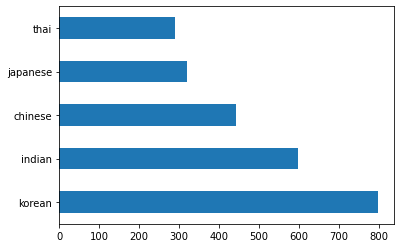

In [7]:
cuisines.cuisine.value_counts().plot.barh()

Observe that the distribution of data is uneven. We need to fix this disparity.
Before that we need to dig a little deeper into the dataset, and find what are the typical ingredients per cuisine.

In [8]:
def create_ingredient_df(cuisines):
    ingredient_df = cuisines.T.drop(['cuisine','Unnamed: 0']).sum(axis=1).to_frame('value')
    ingredient_df = ingredient_df[(ingredient_df.T !=0).any()]
    ingredient_df = ingredient_df.sort_values(by='value', ascending=False, inplace=False)
    return ingredient_df

<AxesSubplot:>

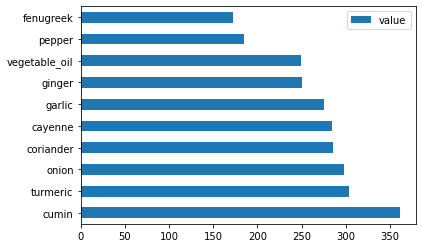

In [25]:
thai_df = cuisines[cuisines['cuisine']=='indian']
thai_ingredient_df = create_ingredient_df(thai_df)
thai_ingredient_df.head(10).plot.barh()